# Statistical Moments

## Section 1: Mean and Median

In [2]:
import findspark

In [3]:
findspark.init("/home/xuren/pyspark/spark-2.4.5-bin-hadoop2.7/")

In [4]:
import pyspark

In [5]:
sc = pyspark.SparkContext()

In [6]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [69]:
rdd = sc.parallelize([101, 102, 103] + list(range(10)))
rdd2 = sc.parallelize([101, 102, 103, 104] + list(range(10)))

In [70]:
rdd.collect()

[101, 102, 103, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [71]:
def mean(rdd):
    s = rdd.sum()
    n = rdd.count()
    
    return s/n

In [72]:
mean(rdd)

27.0

In [38]:
rdd.sortBy(lambda x: x).collect()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 101, 102, 103]

In [44]:
import numpy as np

npa = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 101, 102, 103])

np.median(npa), np.mean(npa)

(6.0, 27.0)

In [64]:
rdd.zipWithIndex().collect()

[(101, 0),
 (102, 1),
 (103, 2),
 (0, 3),
 (1, 4),
 (2, 5),
 (3, 6),
 (4, 7),
 (5, 8),
 (6, 9),
 (7, 10),
 (8, 11),
 (9, 12)]

In [62]:
rdd.sortBy(lambda x: x).zipWithIndex().map(lambda x : (x[1], x[0])).collect()

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 101),
 (11, 102),
 (12, 103)]

In [82]:
def median(rdd):
    n = rdd.count()
    rdd_sorted = rdd.sortBy(lambda x: x).zipWithIndex().map(lambda x : (x[1], x[0]))
    
    if n%2 == 0:
        print("even case")
        v1 = rdd_sorted.lookup(n/2)[0]
        v2 = rdd_sorted.lookup(n/2 - 1)[0]
        return (v1+v2) / 2
    else:
        print("odd case")
        idx = n // 2
        return rdd_sorted.lookup(idx)[0]
        

In [83]:
median(rdd)

odd case


6

In [84]:
median(rdd2)

even case


6.5

In [85]:
rdd2.collect()

[101, 102, 103, 104, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [86]:
np.median([101, 102, 103, 104, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

6.5

## Standard Deviation and Dispersion

In [95]:
rdd.collect()

[101, 102, 103, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [96]:
np.std([101, 102, 103, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

41.15823125451335

In [87]:
mean(rdd)

27.0

In [89]:
rdd.count()

13

In [94]:
(rdd.map(lambda x: (x-27)**2).sum() / 13) ** 0.5

41.15823125451335

In [97]:
def stand_dev(rdd):
    
    # depends on mean function previously defined
    vmean = mean(rdd)
    n = rdd.count()
    
    return (rdd.map(lambda x: (x-vmean)**2).sum() / n) ** 0.5

In [98]:
stand_dev(rdd)

41.15823125451335

In [102]:
import math

In [103]:
def stand_dev_cleaner(rdd):
    
    # depends on mean function previously defined
    vmean = mean(rdd)
    n = rdd.count()
    
    return math.sqrt(rdd.map(lambda x: math.pow((x-vmean), 2)).sum() / n)

In [104]:
stand_dev_cleaner(rdd)

41.15823125451335

## 3rd Statistical Moment - Skewness

$$ \frac{1}{n} * \sum{ \frac{ (x_j - x_b)^3 }{std^3} } $$

In [123]:
def skewness(rdd):
    vmean = mean(rdd)
    n = rdd.count()
    std = stand_dev_cleaner(rdd)
    
    return (1/n) * rdd.map(lambda x: math.pow( (x-vmean), 3) / math.pow(std, 3) ).sum()

In [125]:
skewness(rdd)

1.2650231585636917

In [126]:
from scipy.stats import skew

In [127]:
skew(rdd.collect())

1.2650231585636917

## Fourth Statistical Moment - Kurtosis

$$ \frac{1}{n} * \sum{ \frac{ (x_j - x_b)^4 }{std^4} } $$

In [128]:
from scipy.stats import kurtosis

In [129]:
kurtosis(rdd.collect())

-0.3782772449188676

In [130]:
import matplotlib.pyplot as plt

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([  0. ,  10.3,  20.6,  30.9,  41.2,  51.5,  61.8,  72.1,  82.4,
         92.7, 103. ]),
 <a list of 10 Patch objects>)

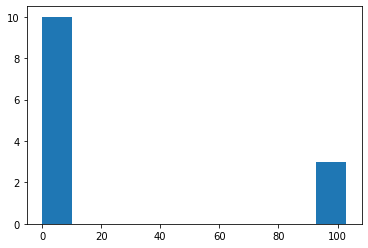

In [131]:
plt.hist(rdd.collect())

In [137]:
def kurtos(rdd):
    vmean = mean(rdd)
    n = rdd.count()
    std = stand_dev_cleaner(rdd)
    
    return (1/n) * rdd.map(lambda x: math.pow( (x-vmean), 4) ).sum() / math.pow(std, 4) - 3

In [138]:
kurtos(rdd)

-0.37827724491886716

In [139]:
kurtosis(rdd.collect(), fisher=False)

2.6217227550811324

In [142]:
def kurtos_nf(rdd):
    vmean = mean(rdd)
    n = rdd.count()
    std = stand_dev_cleaner(rdd)
    
    return (1/n) * rdd.map(lambda x: math.pow( (x-vmean), 4) ).sum() / math.pow(std, 4)

In [143]:
kurtos_nf(rdd)

2.621722755081133

## Covariance and Correlation

In [170]:
import random

In [172]:
rddx = sc.parallelize(range(100))
rddy = sc.parallelize([x*1.2 + random.random() * 10 for x in range(100)])

In [173]:
meanx = rddx.sum()/rddx.count()
meany = rddy.sum()/rddy.count()

In [174]:
meanx, meany

(49.5, 64.29497487633039)

In [175]:
rddxy = rddx.zip(rddy)

In [176]:
rddxy.take(5)

[(0, 7.144721983150811),
 (1, 9.659239212256077),
 (2, 7.411407333500117),
 (3, 5.704522934793009),
 (4, 12.45246945048902)]

$$ corr(X,Y) = \frac{cov(X,Y)}{\sigma X \sigma Y} $$

In [178]:
stand_dev_cleaner(rddy)

34.64299539301995

In [179]:
stand_dev_cleaner(rddx)

28.86607004772212

In [180]:
covxy = rddxy.map(lambda n : (n[0]-meanx) * (n[1] - meany)).sum() / rddxy.count()

(covxy) / (stand_dev_cleaner(rddy) * stand_dev_cleaner(rddx))

0.997041219952582

In [181]:
import matplotlib.pyplot as plt

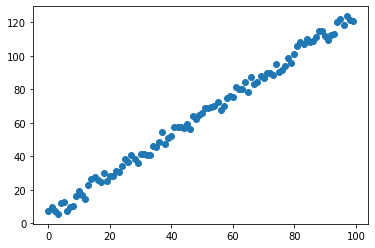

In [183]:
plt.scatter(rddx.collect(), rddy.collect())

In [184]:
from pyspark.mllib.stat import Statistics

In [185]:
rdd1 = sc.parallelize(range(100))
rdd2 = sc.parallelize(range(100, 200))
rdd3 = sc.parallelize(list(reversed(range(100))))
rdd4 = sc.parallelize(random.sample(range(100), 100))

In [186]:
data = rdd1.zip(rdd2).zip(rdd3).zip(rdd4)

In [187]:
data.take(5)

[(((0, 100), 99), 3),
 (((1, 101), 98), 33),
 (((2, 102), 97), 80),
 (((3, 103), 96), 71),
 (((4, 104), 95), 44)]

In [204]:
# we need to flatten
data_flat = data.map(lambda x: [x[0][0][0], x[0][0][1], x[0][1], x[1]])

In [205]:
data_flat.take(5)

[[0, 100, 99, 3],
 [1, 101, 98, 33],
 [2, 102, 97, 80],
 [3, 103, 96, 71],
 [4, 104, 95, 44]]

In [206]:
Statistics.corr(data_flat)

array([[ 1.        ,  1.        , -1.        ,  0.01153315],
       [ 1.        ,  1.        , -1.        ,  0.01153315],
       [-1.        , -1.        ,  1.        , -0.01153315],
       [ 0.01153315,  0.01153315, -0.01153315,  1.        ]])

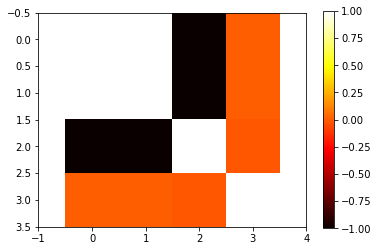

In [217]:
plt.imshow(Statistics.corr(data_flat), cmap="hot")
plt.colorbar()
# plt.grid()
plt.xlim(-1, 4)
plt.show()